In [1]:
import pandas as pd

In [3]:
Tags=pd.read_csv('C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\Text & Tag Mining\TabularTagsAndTranscripts.csv')

In [4]:
Tags.columns

Index(['school', 'Test ID #', 'Task', 'Start time', 'End time', 'Tags',
       'Important', 'Sentiment', 'Note', 'Clip URL', 'Transcript'],
      dtype='object')

In [5]:
# .str.split: split the strings in a list objects
# explode: explode the lists so each list item gets one row in a new data object
# str.rstrip: remove white space on the right side of the tag value
# str.lstrip: remove white space on the left side of the tag value
# str.replace: remove "SnT_" from tag values to improve look of data
# value_counts: count the number of times each tag occurs
# reset_index: turn count object into table
# rename: clean table column names
# .query: remove the NO DATA count and the snt_ count, one is a garbage tag and another is a garbage value I created 

Tags['Tags'].str.split(',').\
    explode().\
    str.rstrip().\
    str.lstrip().\
    str.replace('SnT_','').\
    str.lower().\
    str.capitalize().\
    value_counts().\
    reset_index().\
    rename(columns={'index':'Tag',
                   'Tags':'Tag Count'}).\
    query('Tag!="No data" and Tag!="Snt_"')

,Tag,Tag Count
0,Planning,64
1,Renovation,32
2,Collaboration,27
3,Remotescience,20
4,Interdisciplinary,20
5,Additionalspacerequired,18
6,Decentralized,16
7,Flexlab,16
8,Equipment,11
9,Persqft,10


In [6]:
TagCounts=Tags['Tags'].str.split(',').\
    explode().\
    str.rstrip().\
    str.lstrip().\
    str.replace('SnT_','').\
    str.lower().\
    str.capitalize().\
    value_counts().\
    reset_index().\
    rename(columns={'index':'Tag',
                   'Tags':'Tag Count'}).\
    query('Tag!="No data" and Tag!="Snt_"')

In [7]:
TagCounts.to_csv('TagCountTable.csv')

In [8]:
DF=Tags['Tags'].str.split(',').\
    explode().\
    str.rstrip().\
    str.lstrip().\
    str.replace('SnT_','').\
    str.lower().\
    str.capitalize().\
    value_counts().\
    reset_index().\
    rename(columns={'index':'Tag',
                   'Tags':'TagCount'}).\
    query('Tag!="No data" and Tag!="Snt_"')

In [9]:
from plotnine import *

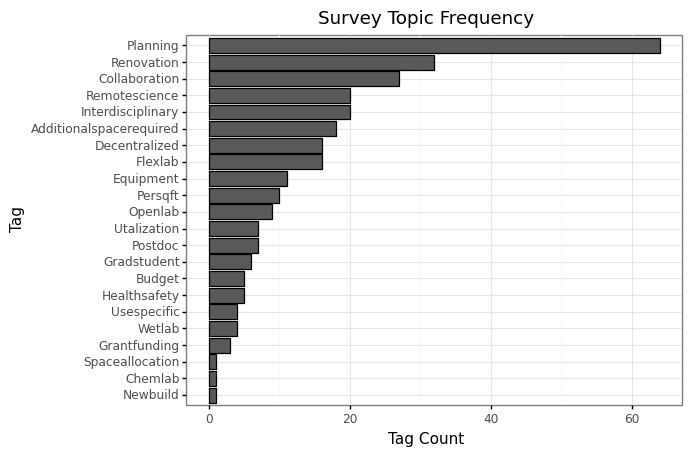

<ggplot: (-9223371876975893488)>

In [10]:
(

    ggplot(DF,aes(x='Tag',y='TagCount'))+
    scale_x_discrete(limits=DF.Tag.tolist()[::-1])+
    geom_col(color='black')+
    coord_flip()+
    theme_bw()+
    ylab('Tag Count')+
    ggtitle("Survey Topic Frequency")

)

In [11]:
TagBySchools=Tags.set_index("school")['Tags'].\
    str.split(',').\
    explode().\
    str.rstrip().\
    str.lstrip().\
    str.replace('SnT_','').\
    str.lower().\
    str.capitalize().\
    reset_index().\
    assign(school=lambda x:x.school.str.title()).\
    rename(columns={"school":"School"})

In [12]:
TagBySchools.to_csv('TagsBySchool_Raw.csv')

In [13]:
import nltk
def tokenlenfilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if len(x)>minlen]
    return (tokens)

def lemmer(text):
    lemma_function = WordNetLemmatizer()

    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV

    return [lemma_function.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(text)]

def get_ngrams(series: pd.Series,n:int):
    ngrams = series.copy().str.split(' ').explode()
    ngrams1 = series.copy().str.split(' ').explode()
    for i in range(1,n):
        foo=ngrams1.groupby(level=0).shift(-i)
        ngrams=ngrams.str.cat(foo,sep=' ')
    ngrams = ngrams.dropna()
    return pd.DataFrame(ngrams)

def get_multigrams(series,n):
    grams=get_ngrams(series,1)
    if n==1:
        return grams
    else:
        for i in range(1,n+1):
            if i==1:
                continue
            grams=grams.append(get_ngrams(series,i))
    return grams

In [14]:
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from collections import defaultdict

In [15]:
from nltk.corpus import stopwords

In [16]:
from nltk.corpus import stopwords
stops=list(stopwords.words('english'))+['um','know','try','trying','get',
                                        "that's","think",'say',
                                        "there's",'lot','go','back',
                                       "would",'yeah',"i'm",'also','even','way','got',
                                       'things','well','like','kind','something','actually','still','5',"one",
                                       'might','maybe','could','okay',"we've","they're","we're"]
def tokennamefilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if x not in stops]
    return (tokens)

In [17]:
def tokennamefilter(tokenlist,minlen=2):
    tokens = [x for x in tokenlist if x not in stops]
    return (tokens)

In [18]:
import nltk

In [19]:
get_ngrams(Tags['Transcript'].str.lower().str.lower().str.replace(',','').str.replace('.','').\
    str.rstrip().\
    str.lstrip().str.split(" ").\
    apply(tokennamefilter).\
    apply(lemmer).\
    apply(' '.join).\
    str.lstrip(),2).\
    value_counts().\
    reset_index().\
    rename(columns={0:'Count'}).\
    head(15).\
    assign(Transcript=lambda x: x.Transcript.str.capitalize()).\
    rename(columns={'Transcript':'BiGram'})
    

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


,BiGram,Count
0,Square foot,18
1,New building,16
2,Build new,14
3,Open lab,12
4,Make sense,11
5,Building build,11
6,Lab space,10
7,Graduate student,10
8,Research lab,9
9,Remote research,9


In [20]:
bigrams=get_ngrams(Tags['Transcript'].str.lower().str.lower().str.replace(',','').str.replace('.','').\
    str.rstrip().\
    str.lstrip().str.split(" ").\
    apply(tokennamefilter).\
    apply(lemmer).\
    apply(' '.join).\
    str.lstrip(),2).\
    value_counts().\
    reset_index().\
    rename(columns={0:'Count'}).\
    head(15).\
    assign(Transcript=lambda x: x.Transcript.str.capitalize()).\
    rename(columns={'Transcript':'BiGram'})

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


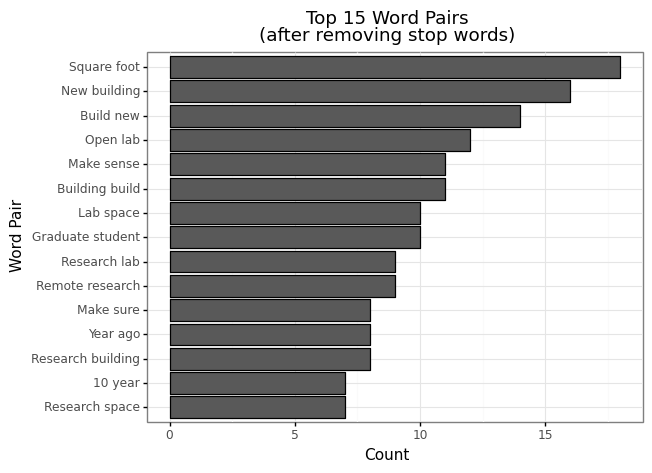

<ggplot: (-9223371876964815856)>

In [21]:
(

    ggplot(bigrams,aes(x='BiGram',y='Count'))+
    scale_x_discrete(limits=bigrams.BiGram.tolist()[::-1])+
    geom_col(color='black')+
    coord_flip()+
    theme_bw()+
    xlab('Word Pair')+
    ylab('Count')+
    ggtitle("Top 15 Word Pairs\n(after removing stop words)")

)

In [22]:
UniGrams=get_ngrams(Tags['Transcript'].str.lower().str.replace(',','').str.replace('.','').\
    str.rstrip().\
    str.lstrip(),1).\
    value_counts().\
    reset_index().\
    rename(columns={0:'Count'}).\
    assign(Bad=lambda x: x.Transcript.isin(stops)*1).\
    query('Bad<1').\
    head(30).drop(columns=('Bad')).assign(Transcript=lambda x: x.Transcript.str.capitalize())

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [23]:
bigstring=" ".join(list(Tags['Transcript'].str.lower().str.replace(',','').str.replace('.','').\
    str.rstrip().\
    str.lstrip()))

C:\Users\dmckenzie\Anaconda3\envs\Three Seven\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.


In [24]:
UniGrams.head(15).reset_index(drop=True)

,Transcript,Count
0,Research,163
1,Space,144
2,Building,126
3,Really,90
4,Lab,80
5,New,77
6,Work,74
7,People,70
8,Buildings,65
9,Need,65


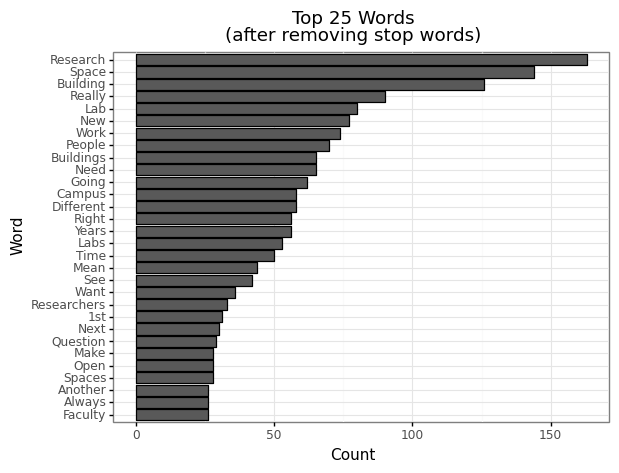

<ggplot: (-9223371876964815388)>

In [25]:
(

    ggplot(UniGrams,aes(x='Transcript',y='Count'))+
    scale_x_discrete(limits=UniGrams.Transcript.tolist()[::-1])+
    geom_col(color='black')+
    coord_flip()+
    theme_bw()+
    xlab('Word')+
    ylab('Count')+
    ggtitle("Top 25 Words\n(after removing stop words)")

)

In [26]:
import numpy as np

In [27]:
from PIL import Image

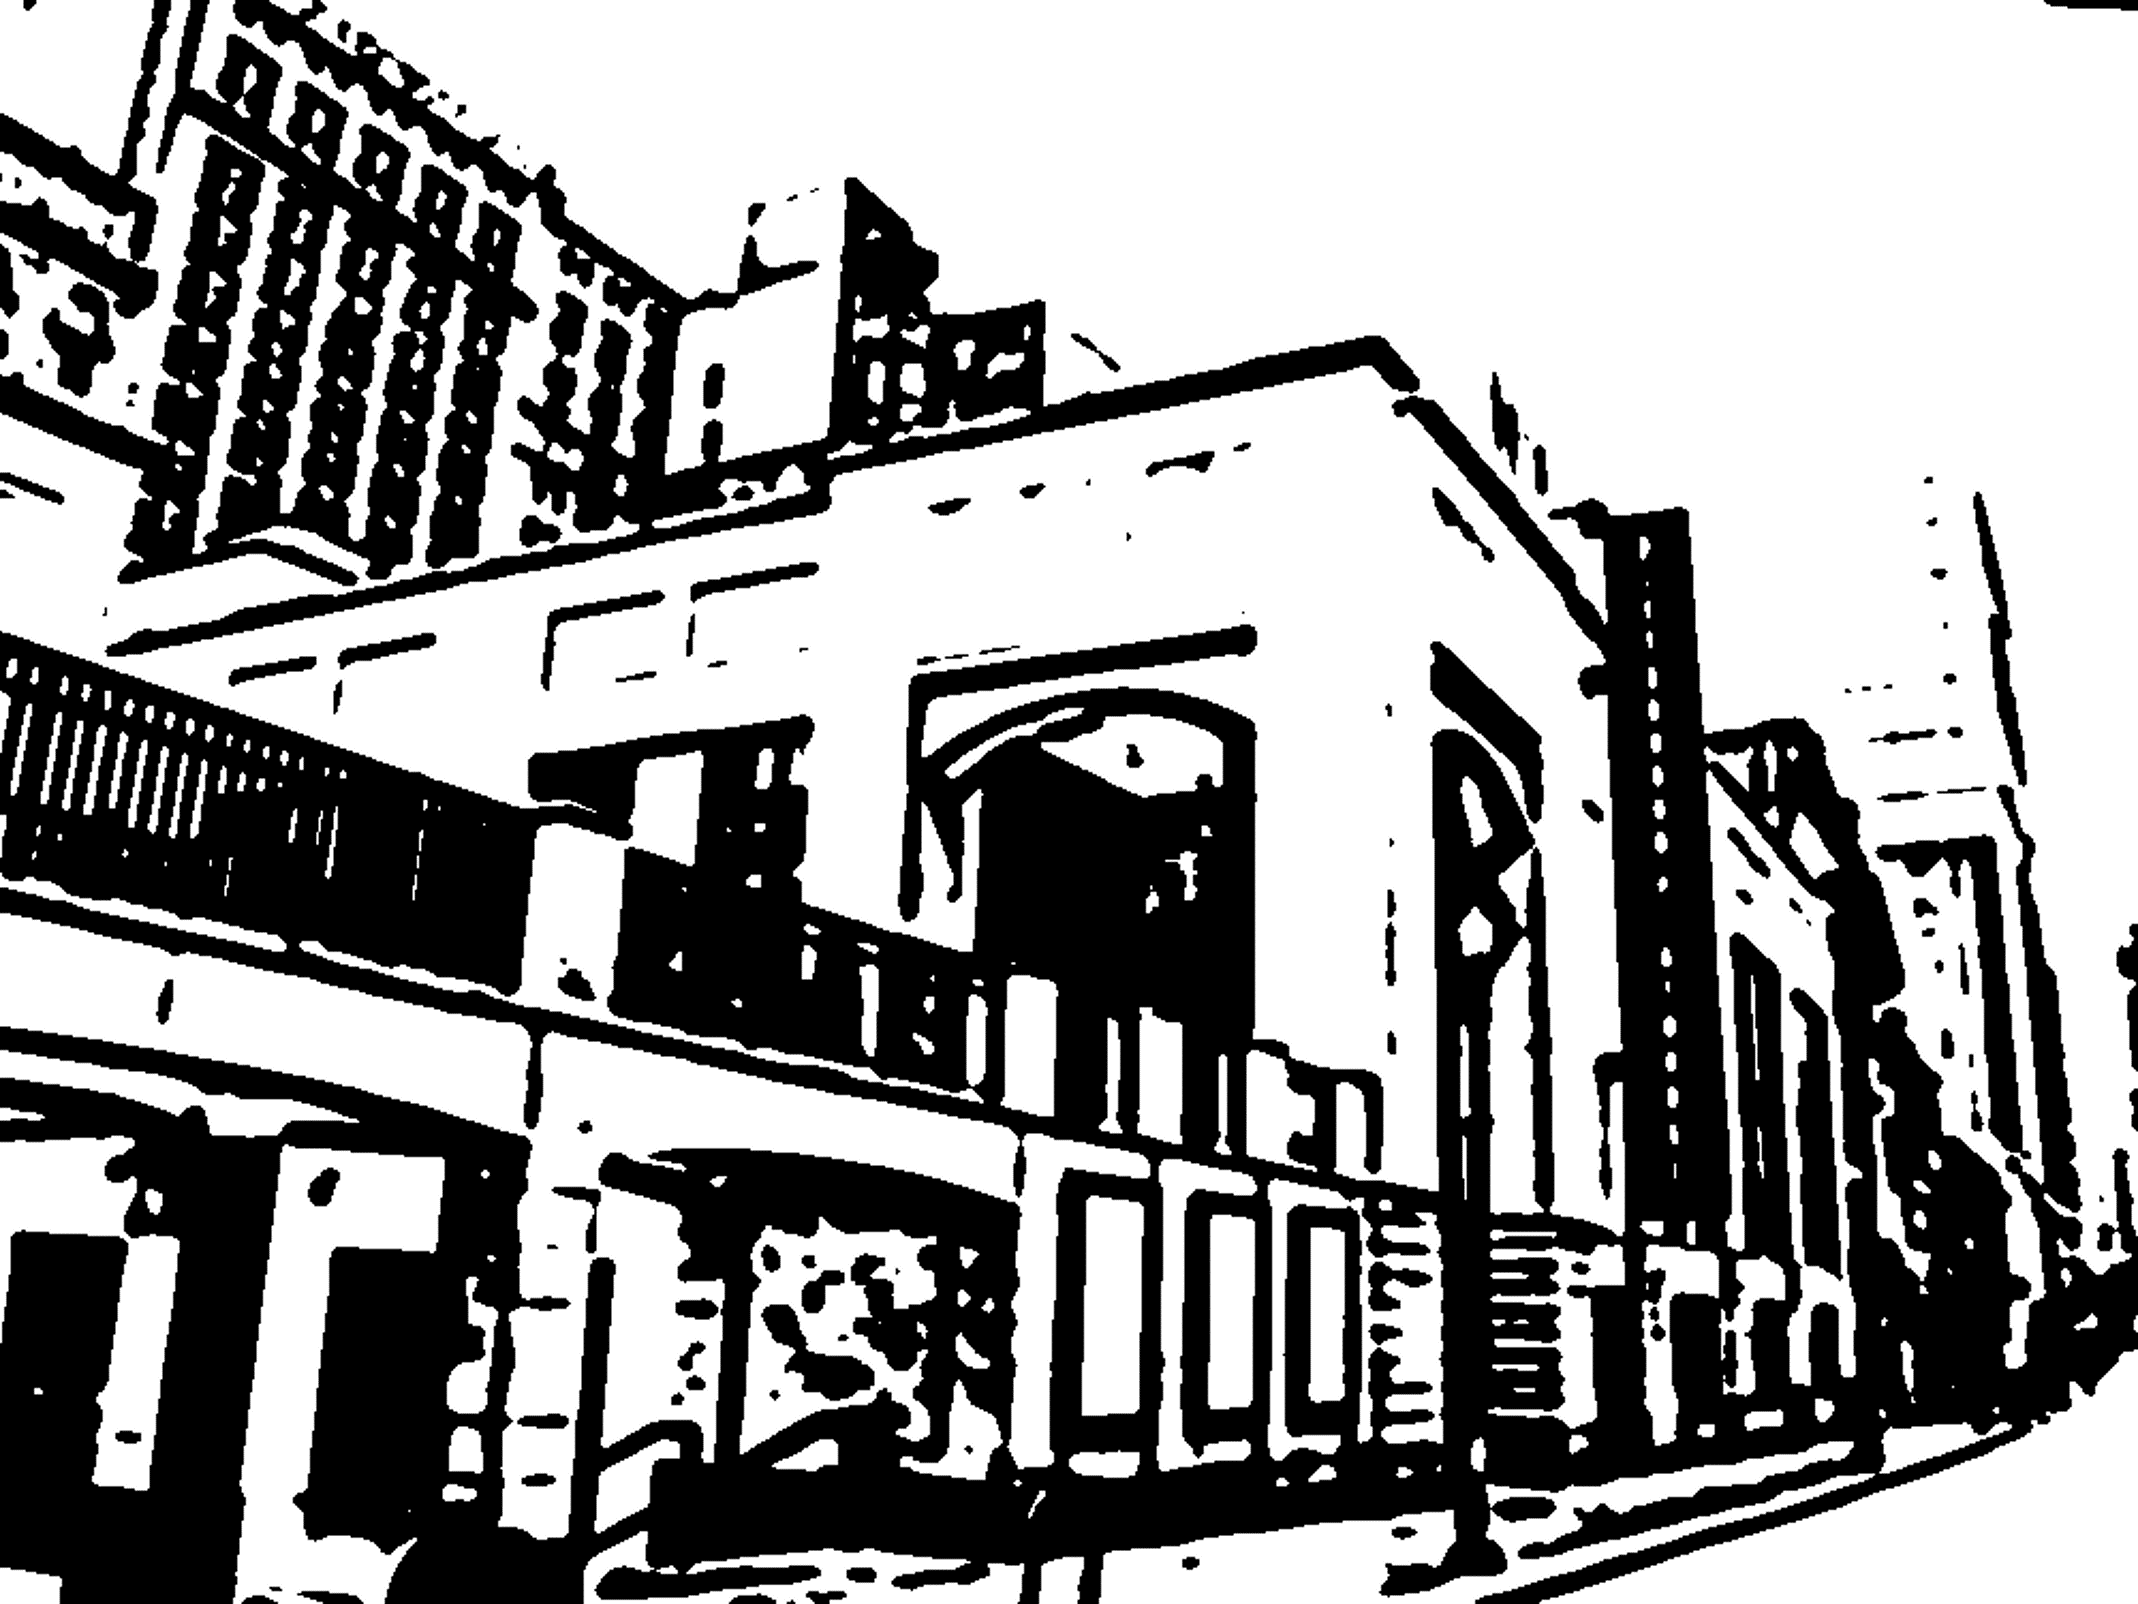

In [28]:
Image.open("C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\\testplayhouse.PNG")

In [29]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [30]:
from matplotlib import pyplot as plt

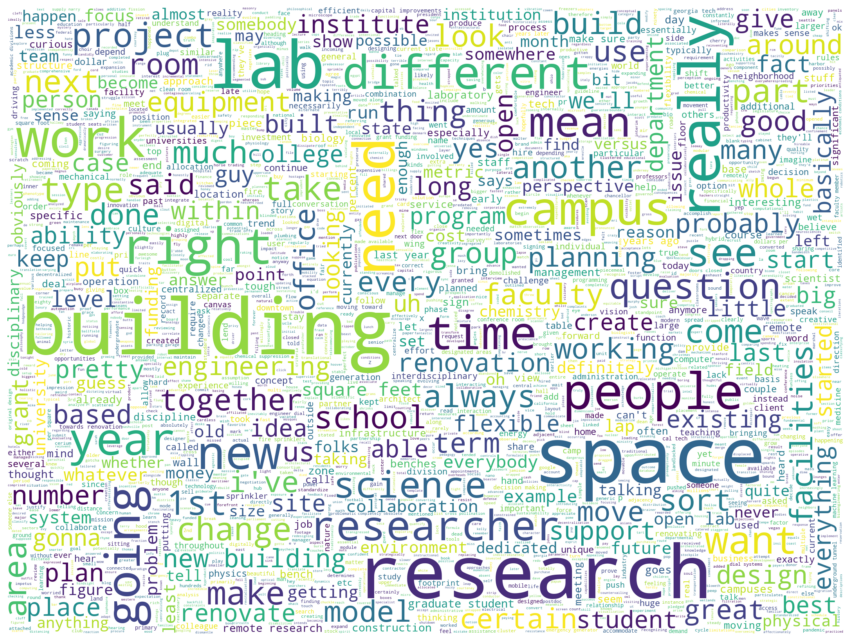

In [31]:
# Generate a word cloud image
mask = np.array(Image.open("C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\\testplayhouse.png"))
wordcloud_usa = WordCloud(stopwords=stops, background_color="white", mode="RGBA", max_words=5000, mask=mask).generate(bigstring)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_usa, interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/us_wine.png", format="png")

plt.show()

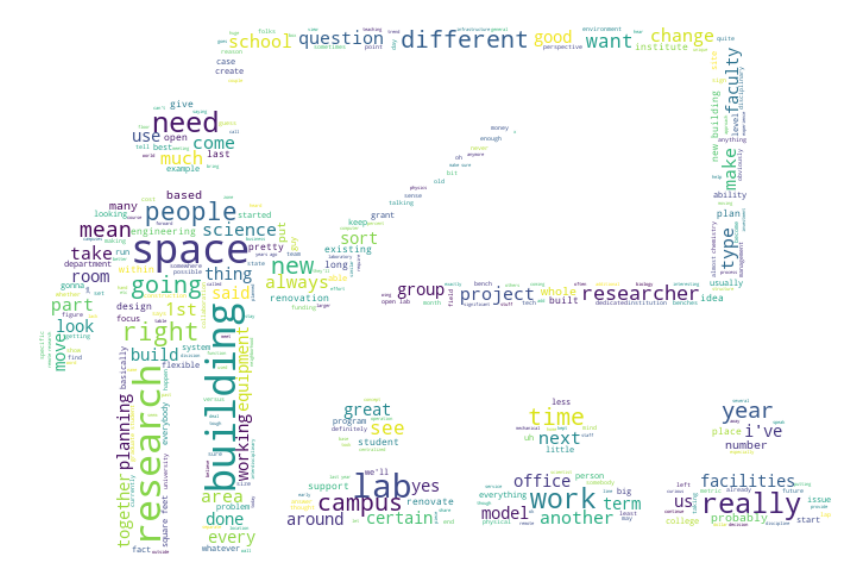

In [133]:
# Generate a word cloud image
mask = np.array(Image.open("C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\B2.PNG"))
wordcloud_usa = WordCloud(stopwords=stops, background_color="white", mode="RGBA", max_words=5000, mask=mask).generate(bigstring)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud_usa, interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/us_wine.png", format="png")

plt.show()

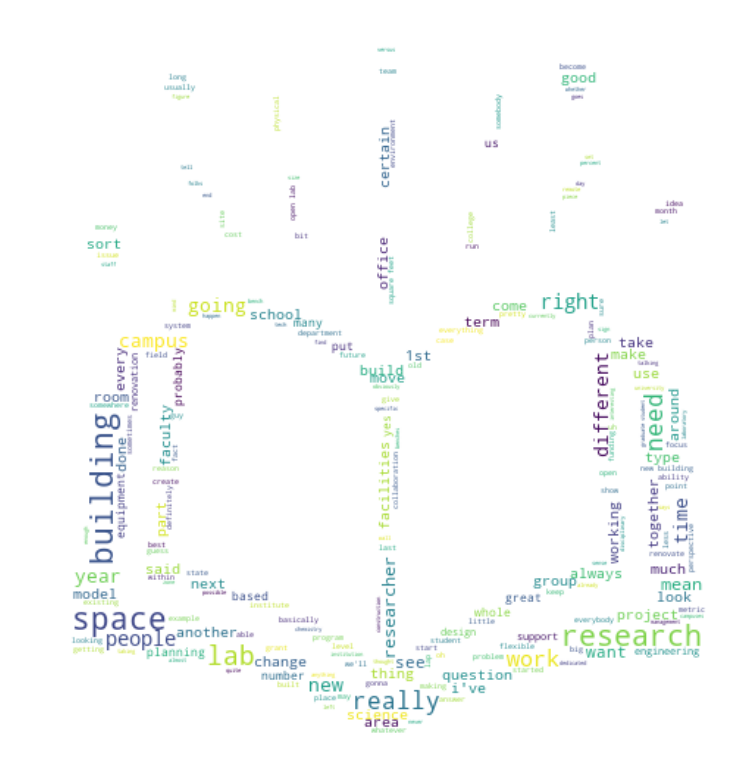

In [134]:
# Generate a word cloud image
mask = np.array(Image.open("C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\B3.PNG"))
wordcloud_usa = WordCloud(stopwords=stops, background_color="white", mode="RGBA", max_words=5000, mask=mask).generate(bigstring)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_usa, interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/us_wine.png", format="png")

plt.show()

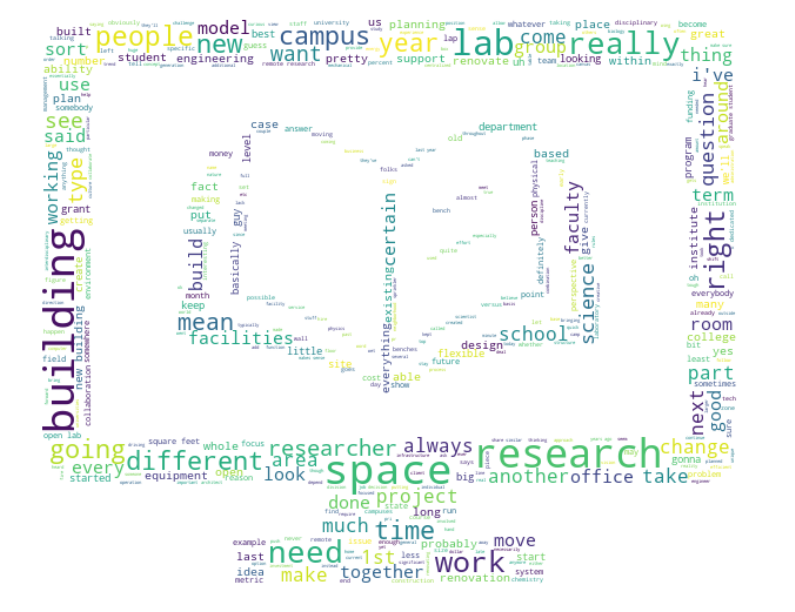

In [135]:
# Generate a word cloud image
mask = np.array(Image.open("C:/Users\dmckenzie\OneDrive - DLR Group\Desktop\B9.PNG"))
wordcloud_usa = WordCloud(stopwords=stops, background_color="white", mode="RGBA", max_words=10000, mask=mask).generate(bigstring)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[14,14])
plt.imshow(wordcloud_usa, interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("img/us_wine.png", format="png")

plt.show()